# Unsupervised Learning | Clustering (Hierarchical) | Case-study

## Car MPG [Clustering (Hierarchical)]

In [1]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline
sns.set()

### Loading & Inspecting Data

In [ ]:
cars = pd.read_csv ('car-mpg.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Exploring Data

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [ ]:
cars_cluster = cars.drop(columns=["name"])

In [ ]:
cars_cluster = pd.get_dummies(cars_cluster, columns=["origin"])

In [ ]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Data Preprocessing

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cars_cluster)

In [ ]:
cars.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 2}

### Model Training & Prediction

In [ ]:
linkage_matrix = linkage(scaled_data, method='ward')

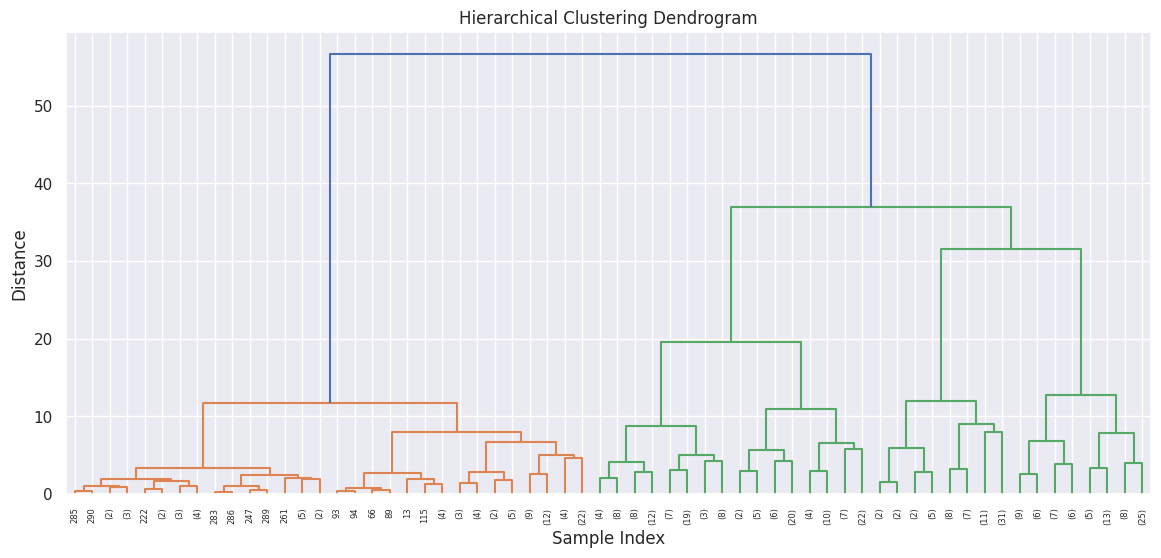

In [ ]:
plt.figure(figsize=(14,6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

==========

In [ ]:
cars = AgglomerativeClustering()

In [ ]:
clusters = cars.fit_predict(scaled_data)

In [ ]:
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')

In [ ]:
cars["cluster"] = clusters

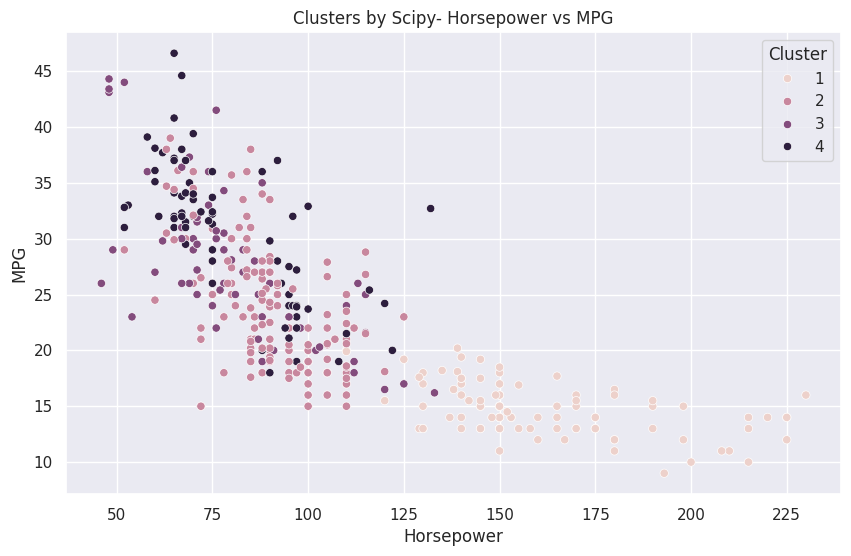

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='cluster')
plt.title("Clusters by Scipy- Horsepower vs MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend(title="Cluster")
plt.show()

# GOOD LUCK!